In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

from scipy import stats

import datetime as dt

%matplotlib inline

In [2]:
end_date = '2024-10-21T00:00:00.000-05:00'

In [3]:
#Read in raw stream guage data
#pompton_plains = pd.read_csv('data/archive/pompton_plains.txt', sep='\t', skiprows=27)
pompton_plains = pd.read_csv('https://nwis.waterservices.usgs.gov/nwis/iv/?sites=01388500&parameterCd=00065&startDT=2022-01-01T11:24:30.377-05:00&endDT='+end_date+'&siteStatus=all&format=rdb', sep='\t', skiprows=27)
pompton_plains = pompton_plains.iloc[1: , :]
pompton_plains['194446_00065'] = pompton_plains['194446_00065'].astype(float)
pompton_plains = pompton_plains[['datetime','194446_00065']]
pompton_plains = pompton_plains.set_index('datetime')
pompton_plains['item_id'] = 'pompton_gage'
pompton_plains.rename(columns={'194446_00065': 'series'}, inplace=True)
pompton_plains.head()

,series,item_id
datetime,,
2022-01-01 12:30,8.3,pompton_gage
2022-01-01 12:45,8.3,pompton_gage
2022-01-01 13:00,8.3,pompton_gage
2022-01-01 13:15,8.3,pompton_gage
2022-01-01 13:30,8.3,pompton_gage


In [4]:
#pequannock_riverdale = pd.read_csv('data/archive/pequannock_riverdale.txt', sep='\t', skiprows=26)
pequannock_riverdale = pd.read_csv('https://waterservices.usgs.gov/nwis/iv/?sites=01382800&parameterCd=00065&startDT=2022-01-01T11:35:34.719-05:00&endDT='+end_date+'&siteStatus=all&format=rdb', sep='\t', skiprows=27)
pequannock_riverdale = pequannock_riverdale.iloc[1: , :]
pequannock_riverdale['194387_00065'] = pequannock_riverdale['194387_00065'].astype(float)
pequannock_riverdale = pequannock_riverdale[['datetime','194387_00065']]
pequannock_riverdale = pequannock_riverdale.set_index('datetime')
pequannock_riverdale['item_id'] = 'riverdale_gage'
pequannock_riverdale.rename(columns={'194387_00065': 'series'}, inplace=True)
pequannock_riverdale.head()

,series,item_id
datetime,,
2022-01-01 12:45,2.45,riverdale_gage
2022-01-01 13:00,2.45,riverdale_gage
2022-01-01 13:15,2.45,riverdale_gage
2022-01-01 13:30,2.45,riverdale_gage
2022-01-01 13:45,2.45,riverdale_gage


In [5]:
#ramapo_pompton = pd.read_csv('data/archive/ramapo_pompton.txt', sep='\t', skiprows=26)
ramapo_pompton = pd.read_csv('https://waterservices.usgs.gov/nwis/iv/?sites=01388000&parameterCd=00065&startDT=2022-01-01T11:37:24.242-05:00&endDT='+end_date+'&siteStatus=all&format=rdb', sep='\t', skiprows=27)
ramapo_pompton = ramapo_pompton.iloc[1: , :]
ramapo_pompton

/var/folders/39/8gc7tmt964lf1zccbqy781gm0000gp/T/ipykernel_12369/4189062329.py:2: DtypeWarning: Columns (1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  ramapo_pompton = pd.read_csv('https://waterservices.usgs.gov/nwis/iv/?sites=01388000&parameterCd=00065&startDT=2022-01-01T11:37:24.242-05:00&endDT='+end_date+'&siteStatus=all&format=rdb', sep='\t', skiprows=27)


,agency_cd,site_no,datetime,tz_cd,194435_00065,194435_00065_cd
1,USGS,01388000,2022-01-01 12:40,EST,7.39,A
2,USGS,01388000,2022-01-01 12:45,EST,7.38,A
3,USGS,01388000,2022-01-01 12:50,EST,7.38,A
4,USGS,01388000,2022-01-01 12:55,EST,7.39,A
5,USGS,01388000,2022-01-01 13:00,EST,7.39,A
...,...,...,...,...,...,...
294150,USGS,1388000,2024-10-21 00:40,EDT,6.57,P
294151,USGS,1388000,2024-10-21 00:45,EDT,6.57,P
294152,USGS,1388000,2024-10-21 00:50,EDT,6.57,P
294153,USGS,1388000,2024-10-21 00:55,EDT,6.57,P


In [6]:
ramapo_pompton['194435_00065'] = ramapo_pompton['194435_00065'].astype(float)
ramapo_pompton = ramapo_pompton[['datetime','194435_00065']]
ramapo_pompton = ramapo_pompton.set_index('datetime')
ramapo_pompton['item_id'] = 'ramapo_gage'
ramapo_pompton.rename(columns={'194435_00065': 'series'}, inplace=True)
ramapo_pompton.head()

,series,item_id
datetime,,
2022-01-01 12:40,7.39,ramapo_gage
2022-01-01 12:45,7.38,ramapo_gage
2022-01-01 12:50,7.38,ramapo_gage
2022-01-01 12:55,7.39,ramapo_gage
2022-01-01 13:00,7.39,ramapo_gage


In [7]:
#ppp = pd.read_csv('data/archive/pompton_plains_precip.txt',sep='\t', skiprows=26)
ppp = pd.read_csv('https://nwis.waterservices.usgs.gov/nwis/iv/?sites=405811074165501&parameterCd=00045&startDT=2022-01-01T11:39:50.674-05:00&endDT='+end_date+'&siteStatus=all&format=rdb',sep='\t', skiprows=26)
ppp = ppp.iloc[1: , :]
ppp['99543_00045'] = ppp['99543_00045'].astype(float)
ppp = ppp.rename(columns={"99543_00045": "pompton_precip"})
ppp = ppp[['datetime','pompton_precip']]
ppp = ppp.set_index('datetime')
ppp['item_id'] = 'pompton_precip'
ppp.rename(columns={'pompton_precip': 'series'}, inplace=True)
ppp.head()

,series,item_id
datetime,,
2024-06-23 00:00,0.0,pompton_precip
2024-06-23 00:15,0.0,pompton_precip
2024-06-23 00:30,0.0,pompton_precip
2024-06-23 00:45,0.0,pompton_precip
2024-06-23 01:00,0.0,pompton_precip


In [8]:
#rpp = pd.read_csv('data/archive/ramapo_pompton_precip.txt',sep='\t', skiprows=26)
rpp = pd.read_csv('https://waterservices.usgs.gov/nwis/iv/?sites=410239074173501&parameterCd=00045&startDT=2022-01-01T11:40:45.545-05:00&endDT='+end_date+'&siteStatus=all&format=rdb',sep='\t', skiprows=26)
rpp = rpp.iloc[1: , :]
rpp['99565_00045'] = rpp['99565_00045'].astype(float)
rpp = rpp.rename(columns={"99565_00045": "ramapo_precip"})
rpp = rpp[['datetime','ramapo_precip']]
rpp = rpp.set_index('datetime')
rpp['item_id'] = 'ramapo_precip'
rpp.rename(columns={'ramapo_precip': 'series'}, inplace=True)
rpp.head()

,series,item_id
datetime,,
2024-06-23 00:00,0.0,ramapo_precip
2024-06-23 00:15,0.0,ramapo_precip
2024-06-23 00:30,0.0,ramapo_precip
2024-06-23 00:45,0.0,ramapo_precip
2024-06-23 01:00,0.0,ramapo_precip


In [9]:
merge = pd.concat([pompton_plains, pequannock_riverdale, ramapo_pompton, ppp, rpp])

In [10]:
#merge = merge.convert_frequency(freq='H', agg_numeric="max")

In [11]:
merge.reset_index(inplace=True)

merge

,datetime,series,item_id
0,2022-01-01 12:30,8.3,pompton_gage
1,2022-01-01 12:45,8.3,pompton_gage
2,2022-01-01 13:00,8.3,pompton_gage
3,2022-01-01 13:15,8.3,pompton_gage
4,2022-01-01 13:30,8.3,pompton_gage
...,...,...,...
513633,2024-10-21 00:00,0.0,ramapo_precip
513634,2024-10-21 00:15,0.0,ramapo_precip
513635,2024-10-21 00:30,0.0,ramapo_precip
513636,2024-10-21 00:45,0.0,ramapo_precip


In [12]:
#train_data = merge.convert_frequency(freq='H', agg_numeric="max")

In [13]:
train_data = TimeSeriesDataFrame.from_data_frame(merge, id_column="item_id", timestamp_column='datetime') #, timestamp_column=merge.index
train_data.head()


series
item_id      timestamp                  
pompton_gage 2022-01-01 12:30:00     8.3
             2022-01-01 12:45:00     8.3
             2022-01-01 13:00:00     8.3
             2022-01-01 13:15:00     8.3
             2022-01-01 13:30:00     8.3

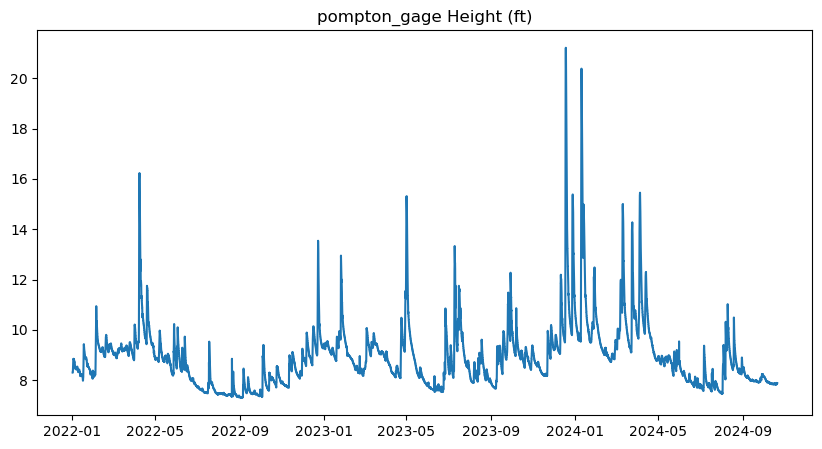

In [14]:
item_id = 'pompton_gage'

plt.figure(figsize=(10, 5))
plt.title(item_id+' Height (ft)')

y_past = train_data.loc[item_id]["series"]

plt.plot(y_past, label="Past time series values")

In [15]:
#test_data.head()

In [16]:
train_data = train_data.convert_frequency(freq='H', agg_numeric="max")

/Users/tott/opt/anaconda3/envs/py310/lib/python3.10/site-packages/autogluon/timeseries/dataset/ts_dataframe.py:942: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset = pd.tseries.frequencies.to_offset(freq)


In [17]:
train_data.head()

series
item_id      timestamp                  
pompton_gage 2022-01-01 12:00:00     8.3
             2022-01-01 13:00:00     8.3
             2022-01-01 14:00:00     8.3
             2022-01-01 15:00:00     8.3
             2022-01-01 16:00:00     8.3

In [18]:
prediction_length = 48
train_data, test_data = train_data.train_test_split(prediction_length)

In [19]:
#train_data

In [20]:
#test_data

In [21]:
predictor = TimeSeriesPredictor(
    prediction_length=prediction_length,
    path="models/pompton_gage_autogluon_"+str(prediction_length),
    target="series",
    eval_metric="RMSE",
)

predictor.fit(
    train_data,
    presets="fast_training",
    num_val_windows = 8,#
    time_limit=600,
)

Beginning AutoGluon training... Time limit = 600s
AutoGluon will save models to 'models/pompton_gage_autogluon_48'
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.11
Operating System:   Darwin
Platform Machine:   x86_64
Platform Version:   Darwin Kernel Version 23.6.0: Mon Jul 29 21:14:30 PDT 2024; root:xnu-10063.141.2~1/RELEASE_ARM64_T6000
CPU Count:          10
GPU Count:          0
Memory Avail:       0.79 GB / 16.00 GB (4.9%)
Disk Space Avail:   15.31 GB / 926.35 GB (1.7%)
Setting presets to: fast_training

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': RMSE,
 'hyperparameters': 'very_light',
 'known_covariates_names': [],
 'num_val_windows': 8,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'target': 'series',
 'time_limit': 600,
 'verbosity': 2}

Inferred time series frequency: 'h'
train_da

In [22]:
predictions = predictor.predict(test_data)
predictions

data contains missing values represented by NaN. They have been filled by carrying forward the last valid observation.
Model not specified in predict, will default to the model with the best validation score: Naive


mean       0.1       0.2       0.3  \
item_id       timestamp                                                 
pompton_gage  2024-10-21 02:00:00  7.88  7.829001  7.846508  7.859132   
              2024-10-21 03:00:00  7.88  7.807877  7.832635  7.850488   
              2024-10-21 04:00:00  7.88  7.791668  7.821990  7.843855   
              2024-10-21 05:00:00  7.88  7.778003  7.813016  7.838264   
              2024-10-21 06:00:00  7.88  7.765964  7.805110  7.833337   
...                                 ...       ...       ...       ...   
ramapo_precip 2024-10-22 21:00:00  0.00 -2.572899 -1.689675 -1.052809   
              2024-10-22 22:00:00  0.00 -2.601972 -1.708768 -1.064706   
              2024-10-22 23:00:00  0.00 -2.630724 -1.727650 -1.076471   
              2024-10-23 00:00:00  0.00 -2.659165 -1.746328 -1.088109   
              2024-10-23 01:00:00  0.00 -2.687305 -1.764808 -1.099623   

                                        0.4   0.5       0.6       0.7  \
item_id       timestamp                                                 
pompton_gage  2024-10-21 02:00:00  7.869918  7.88  7.890082  7.900868   
              2024-10-21 03:00:00  7.865742  7.88  7.894258  7.909512   
              2024-10-21 04:00:00  7.862538  7.88  7.897462  7.916145   
              2024-10-21 05:00:00  7.859836  7.88  7.900164  7.921736   
              2024-10-21 06:00:00  7.857456  7.88  7.902544  7.926663   
...                                     ...   ...       ...       ...   
ramapo_precip 2024-10-22 21:00:00 -0.508631  0.00  0.508631  1.052809   
              2024-10-22 22:00:00 -0.514378  0.00  0.514378  1.064706   
              2024-10-22 23:00:00 -0.520062  0.00  0.520062  1.076471   
              2024-10-23 00:00:00 -0.525684  0.00  0.525684  1.088109   
              2024-10-23 01:00:00 -0.531247  0.00  0.531247  1.099623   

                                        0.8       0.9  
item_id       timestamp                                
pompton_gage  2024-10-21 02:00:00  7.913492  7.930999  
              2024-10-21 03:00:00  7.927365  7.952123  
              2024-10-21 04:00:00  7.938010  7.968332  
              2024-10-21 05:00:00  7.946984  7.981997  
              2024-10-21 06:00:00  7.954890  7.994036  
...                                     ...       ...  
ramapo_precip 2024-10-22 21:00:00  1.689675  2.572899  
              2024-10-22 22:00:00  1.708768  2.601972  
              2024-10-22 23:00:00  1.727650  2.630724  
              2024-10-23 00:00:00  1.746328  2.659165  
              2024-10-23 01:00:00  1.764808  2.687305  

[240 rows x 10 columns]

In [23]:
predictor.leaderboard(test_data)

data contains missing values represented by NaN. They have been filled by carrying forward the last valid observation.
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,WeightedEnsemble,-0.014332,-0.099355,0.032019,0.031300,2.335297,5
1,SeasonalNaive,-0.014332,-0.099355,0.033685,0.031580,0.594065,2
2,Naive,-0.014332,-0.099355,0.030754,0.031300,3.221719,1
3,Theta,-0.015447,-0.099651,0.343329,0.354760,9.978291,4
4,ETS,-0.020872,-0.105979,0.189914,0.118417,17.893662,3


In [24]:
predictor.leaderboard(test_data)

data contains missing values represented by NaN. They have been filled by carrying forward the last valid observation.
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,WeightedEnsemble,-0.014332,-0.099355,0.032019,0.031300,2.335297,5
1,SeasonalNaive,-0.014332,-0.099355,0.033685,0.031580,0.594065,2
2,Naive,-0.014332,-0.099355,0.030754,0.031300,3.221719,1
3,Theta,-0.015447,-0.099651,0.343329,0.354760,9.978291,4
4,ETS,-0.020872,-0.105979,0.189914,0.118417,17.893662,3


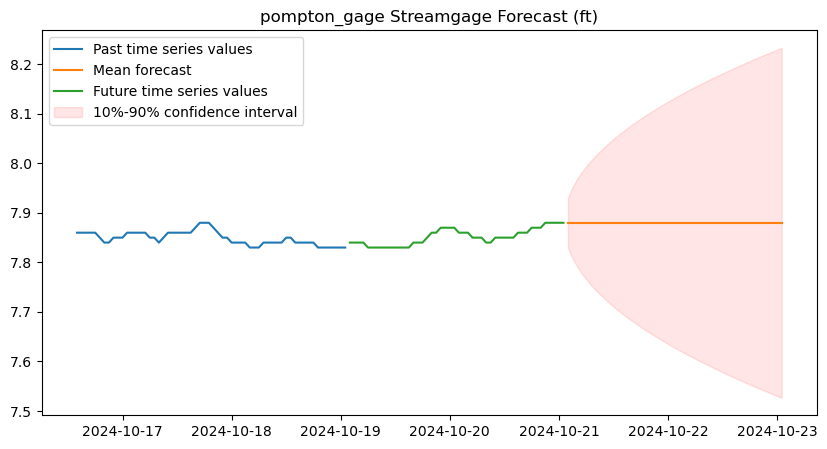

In [25]:
# TimeSeriesDataFrame can also be loaded directly from a file

#test_data = predictions

item_id = 'pompton_gage'

plt.figure(figsize=(10, 5))
plt.title(item_id+' Streamgage Forecast (ft)')

y_past = train_data.loc[item_id]["series"]
y_pred = predictions.loc[item_id]
y_test = test_data.loc[item_id]["series"]

plt.plot(y_past[-60:], label="Past time series values")
plt.plot(y_pred["mean"], label="Mean forecast")
plt.plot(y_test[-prediction_length:], label="Future time series values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend(loc = 'upper left');
plt.savefig(item_id+'_'+str(prediction_length)+'_forecast.png')

In [26]:
y_pred[['mean', '0.1', '0.9']]

,mean,0.1,0.9
timestamp,,,
2024-10-21 02:00:00,7.88,7.829001,7.930999
2024-10-21 03:00:00,7.88,7.807877,7.952123
2024-10-21 04:00:00,7.88,7.791668,7.968332
2024-10-21 05:00:00,7.88,7.778003,7.981997
2024-10-21 06:00:00,7.88,7.765964,7.994036
2024-10-21 07:00:00,7.88,7.755080,8.004920
2024-10-21 08:00:00,7.88,7.745070,8.014930
2024-10-21 09:00:00,7.88,7.735754,8.024246
2024-10-21 10:00:00,7.88,7.727004,8.032996


In [27]:
predictions.info()

<class 'autogluon.timeseries.dataset.ts_dataframe.TimeSeriesDataFrame'>
MultiIndex: 240 entries, ('pompton_gage', Timestamp('2024-10-21 02:00:00')) to ('ramapo_precip', Timestamp('2024-10-23 01:00:00'))
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mean    240 non-null    float64
 1   0.1     240 non-null    float64
 2   0.2     240 non-null    float64
 3   0.3     240 non-null    float64
 4   0.4     240 non-null    float64
 5   0.5     240 non-null    float64
 6   0.6     240 non-null    float64
 7   0.7     240 non-null    float64
 8   0.8     240 non-null    float64
 9   0.9     240 non-null    float64
dtypes: float64(10)
memory usage: 19.9+ KB
